<h1><center><b>Machine Learning and Neural Networks course</b></center></h1>
<h3><center>Exercise 3</center></h3>

*Your* Name:  
<font color='red'>
David Bouhadana, 200789667   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers. The code has to be clean and clearly commented
- You should not change the code we provided you.
- When you finish the assignment, download this **notebook** and the ***predictions.txt*** files. Grades will be based on both files! Submit both to the Moodle system. To Download the notebook go to "File" -> "Download .ipynb".  
- **Submit deadline: 03/01/2025**


## Part 1 - Neural Network using NumPy

In this part we learn to:
1. Load and preprocess datasets.
2. Implement and train a neural network (multi-layer perceptron) for handwriting recognition (MNIST dataset), using numpy library only.




### **1. Dataset**


Import useful packages

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

Download the MNIST dataset

In [7]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

Data normalization

In [8]:
""" 𝑋ₙₒᵣₘ = (𝑋 − 𝑋ₘᵢₙ) / (𝑋ₘₐₓ − 𝑋ₘᵢₙ) """
def min_max_norm(X):
  min_max_scaler = preprocessing.MinMaxScaler()
  normalizedData = min_max_scaler.fit_transform(X)
  return normalizedData

def turn_y_to_one_hot(y):
  y = y.reshape(-1, 1)
  encoder = OneHotEncoder(sparse_output=False)
  y_one_hot = encoder.fit_transform(y)
  return y_one_hot

X = min_max_norm(X)
y = turn_y_to_one_hot(y.astype(int))

Split the data into Train set and Test set

In [9]:
""" Splitting data into test and train sets."""
def train_test_split(data, test_size):
    split = int(X.shape[0]*(1-test_size))
    data_train, data_test =  data[:split], data[split:]
    return data_train, data_test

X_train, X_test = train_test_split(X, 0.3)
y_train, y_test = train_test_split(y, 0.3)

Activation function

In [10]:
""" σ(z)= 1/(1+ e^-z)"""
def sigmoid(z):
  return  1/(1+np.exp(-z))

""" σ′(z) = σ(z)(1 − σ(z)) """
def sigmoid_derivative(z):
  return sigmoid(z) * (1- sigmoid(z))

Softmax function

In [11]:
"""Compute softmax values for each sets of scores in x."""
def softmax(z):
  z_stable = z - np.max(z) # Subtract max value for numerical stability
  exp_z = np.exp(z_stable)
  return exp_z / np.sum(exp_z)

Loss function

In [12]:
"""Negative Log Likelihood loss function for the multiclass"""
def nll_loss(y_pred, y):
  eps = 1e-8 # Add a small constant to y_pred for numerical stability
  loss = -np.sum(y * np.log(y_pred + eps))
  return loss / float(y_pred.shape[0])

Hyper-Parameters

In [13]:
'''Define model parameters'''
input_size = X.shape[1]  # 784 features
hidden_size = 80         # Hyperparameter
learning_rate = 0.1      # Hyperparameter
num_of_epochs = 10       # Hyperparameter
output_size = 10         # 10 classes

Parameters initialization

In [14]:
'''Initializing weights and biases'''
W1 = np.random.randn(input_size, hidden_size)*0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)*0.01
b2 = np.zeros((1, output_size))

### **2. Training**


In [15]:
def forword_propogation(xi):
    z1 = np.dot(xi,W1) + b1
    h1 = sigmoid(z1)
    Z2 = np.dot(h1,W2) + b2 #logits, no softmax applied
    return Z2, z1, h1, W2, W1 , b1, b2

def train(X, y, num_of_epochs):
  train_size = len(X)

  for epoch in range(num_of_epochs):
    avg_epoch_loss = 0
    for i in range(train_size):
      '''Forward propagation'''

      Z2, z1, h1 ,W2, W1 , b1, b2 = forword_propogation(X[i])
      y_hat = softmax(Z2)
      y_true = y[i]

      '''adding xi sample loss to epoch avg_loss'''
      loss =  nll_loss(y_hat, y_true)
      avg_epoch_loss = avg_epoch_loss + loss

      '''Back propagation - the gradients of each parameter'''
      dZ2 = (y_hat - y_true)
      dW2 = np.dot(h1.T, dZ2)
      db2 = dZ2*1
      dh1 = np.dot(dZ2, W2.T)
      dz1 = dh1*sigmoid_derivative(z1)
      xi_reshaped = X[i].reshape(-1, 1)
      dW1 = np.dot(xi_reshaped, dz1)
      db1 = dz1*1

      '''Updating weights'''
      W2 -= learning_rate * dW2
      b2 -= learning_rate * db2
      W1 -= learning_rate * dW1
      b1 -= learning_rate * db1

    avg_epoch_loss = (avg_epoch_loss/train_size)

    print("Epoch:", epoch," Loss:", avg_epoch_loss)

### **3. Test**

Here you should test your model

In [16]:
'''Testing model and return the accuracy on the test set'''
def test(X, y):
  true_pred_counter = 0
  testing_size = len(X)
  for i in range(testing_size):
    Z2, *_ = forword_propogation(X[i])
    y_pred = softmax(Z2)
    if np.where(y[i] == 1)[0] == np.argmax(y_pred, axis=1):
      true_pred_counter+=1

  return true_pred_counter/testing_size

### **4. Main**

In [17]:
train(X_train, y_train, num_of_epochs)
accuracy = test(X_test, y_test)

print(f'prediction accuracy:{accuracy}')

Epoch: 0  Loss: 0.26662435076508734
Epoch: 1  Loss: 0.12956168703273369
Epoch: 2  Loss: 0.09703118275315173
Epoch: 3  Loss: 0.07803088874672813
Epoch: 4  Loss: 0.05970349255513965
Epoch: 5  Loss: 0.05258261977668687
Epoch: 6  Loss: 0.04638589545831946
Epoch: 7  Loss: 0.039806502972978254
Epoch: 8  Loss: 0.03590107075023676
Epoch: 9  Loss: 0.0317687662128875
prediction accuracy:0.9691904761904762


## Part 2 - Neural Network in PyTorch

____________

In this part we learn to:
1. Load and preprocess datasets using pytorch.
2. Implement and train a neural network (MLP) on the MNIST dataset, using Pytorch.
3. Implement and train a convolutional neural network (CNN) on MNIST dataset using Pytorch.

### **1. Setup**
Before running code on Colab:
- Go to "Runtime" -> "Change runtime type", and make sure to choose "GPU" for Hardware accelerator.
- Check your Python version at the command line by running "!python --version". It should be Python 3.10 by default.
- Upload all files of this assignment (code and datasets) to your Drive (e.g "machine_learning_intro/assignments/assignment3") and mount that data to the machine. See the next cell below. In principle, it is also possible to upload files to the local disk of the colab machines. However, such files will be deleted when the machine is restarted.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# check python version
!python --version

Python 3.10.12


In [20]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'machine_learning_intro/assignments/assignment5/'
FOLDERNAME = 'machine_learning_intro/assignments/'
ASSIGNMENTNAME = 'assignment3'

%cd drive/My\ Drive
%cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
%cd ../../

Mounted at /content/drive
/content/drive/My Drive
/content


### **2. Dataset**

In this exercise, we are going to build a neural network that identify handwritten digits. We will use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels and there are 10 different digits. The network will take these images and predict the digit in them.





Let's visualize the data before working with it.  
1. We can use the "torchvision" package to download the trainset. Set ```transform``` as to be the transform function below (It normalizes each image) and ```train=True```.
2. We use torch.utils.data.DataLoader to load the data. Set ```batch_size=64```.

In [21]:
# load packages
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [22]:
data_path = "./MNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the data
mnist_data = datasets.MNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

Using the ```mnist_data``` (dataset) and ```mnist dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data.
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.

In [23]:
# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)

# 1. Print the number of samples in the whole dataset.
print(f"Number of samples in the dataset: {len(mnist_data)}")

# 2. Print the number of samples in a single batch.
print(f"Number of samples in a single batch: {batch_images.shape[0]}")

# 3. Print the shape of images in the data (image dimensions).
image, label = mnist_data[0]
print(f"shape of images in the data: {image.shape}")

# 4. Print the number of labels in the whole dataset (using the targets in the dataloader).
all_labels = [label for _, label in mnist_data] # Extract all labels from mnist_data
num_labels = len(set(all_labels)) # Find the number of unique labels
print(f"Number of unique labels in the dataset: {num_labels}")

Number of samples in the dataset: 60000
Number of samples in a single batch: 64
shape of images in the data: torch.Size([1, 28, 28])
Number of unique labels in the dataset: 10


Labels: tensor([7, 9, 5])


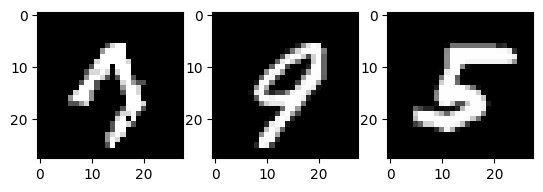

In [24]:
# 5. plot three images and print their labels
idx = np.random.choice(range(64),3) # three rundom indices
plt.subplot(1,3,1)
plt.imshow(batch_images[idx[0]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(batch_images[idx[1]].numpy().squeeze(), cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(batch_images[idx[2]].numpy().squeeze(), cmap='Greys_r')
print("Labels:",batch_labels[idx])

### **3. Neural Network - Architecture**

In the next section, we are going to implement a neural network with pytorch that gets mnist images and recognize the digit in them.  

Network Architecture (see image below): **784 input units**, a hidden layer with **128 units** and a **ReLU activation**, then a hidden layer with **64 units** and a **ReLU activation**, and finally an **output layer** with a **log-softmax activation**.

Note: Since simple neural networks get vectors as inputs, and not images (unlike CNNs), we should flatten the data. Each sample with shape (28,28) becomes (784,). That is why the input layer has 784 units.  


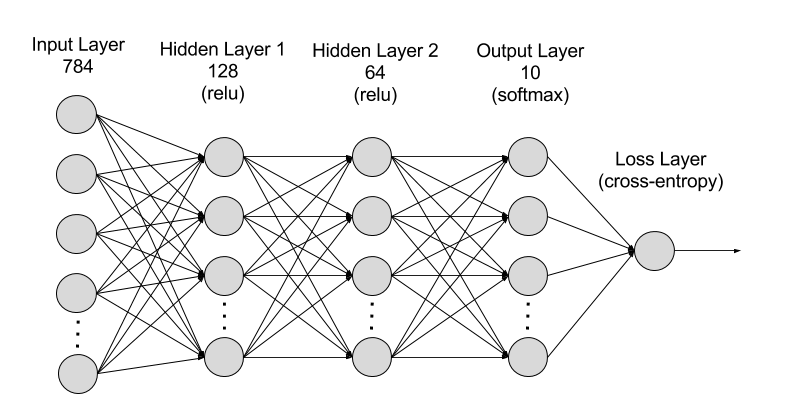

Complete the code below: The constructor (```__init___```) should contain defenitions of layers like ```Linear``` or ```Relu```. The ```forward``` function should contain the logic between the layers declared in the constructor.  

For this section, as well as the next section, you can follow online tutorials (like **[this tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)** or **[this one](https://www.marktechpost.com/2019/11/09/create-a-neural-network-with-pytorch/)**) to understand how to implement neural networks with pytorch.

In [25]:
from torch import nn, optim, flatten
import torch.nn.functional as F

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        )
        pass

    def forward(self, X):
        ''' Forward pass through the network, returns log_softmax values '''
        X = X.view(X.size(0), -1)
        logits = self.linear_relu_stack(X)
        output_layer = F.log_softmax(logits, dim=1)
        return output_layer

model = NeuralNetwork()
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

Now that we have a network, let's see what happens when we pass in an image.  
Let's choose a random image and pass it through the network. It should return a prediction - confidences for each class. The class with the highest confidence is the prediction of the model for that image.   
We visualize the results using ```view_classify``` function below.

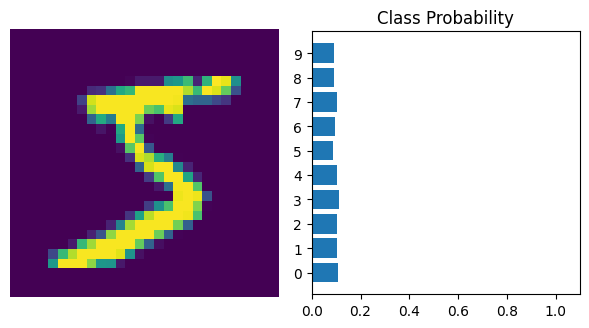

In [27]:
def view_classify(img, ps, version="MNIST"):
    '''
    Function for viewing an image and it's predicted classes.
    image - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

image, label = mnist_data[0]
ps = torch.exp(model.forward(image))
view_classify(image, ps)

In [28]:
def random_prediction_example(data_loader, model, is_image_input=False):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  if not is_image_input:
    images.resize_(64, 1, 784)
    img = images[0]
  else:
    img = images[0].reshape(1, 1, 28, 28)
  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)

  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps

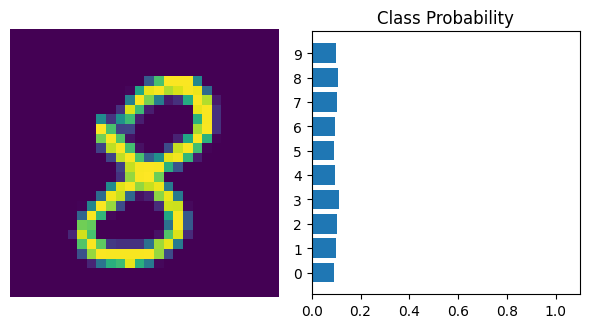

In [29]:
# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

Print the prediction of the network for that sample:

In [30]:
preds_conf

tensor([[0.0921, 0.1004, 0.1024, 0.1100, 0.0970, 0.0929, 0.0933, 0.1030, 0.1081,
         0.1008]])

### **4. Neural Network - Training**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest (20%).
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.003``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set.
7. During training, for each epoch, track the training loss and validation loss.

In [31]:
from torch.utils import data
from torch.utils.data import random_split, DataLoader

In [32]:
'''split trainset into train and validation'''
train_dataset, validation_dataset = random_split(mnist_data , [0.8, 0.2])

'''create data loader for the trainset (batch_size=64, shuffle=True)'''
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

'''create data loader for the valset (batch_size=64, shuffle=False)'''
val_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)

In [33]:
# 3. set hyper parameters
learning_rate = 0.003
nepochs = 5

In [34]:
model = NeuralNetwork()

'''sgd optimizer. It should optimize our model parameters'''
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
'''loss criterion is of type negative log-likelihood loss (multi-class classification task)'''
criterion = nn.NLLLoss()

In [35]:
# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode
          # Forward pass
          predict = model(images)
          #Computing loss
          loss = criterion(predict, labels)

          #Backpropagation
          loss.backward()        # Compute gradients - propagiting the loss back
          optimizer.step()       # Tell the optimizer the gradients, then step.
          optimizer.zero_grad()  # Zero the gradients to start fresh next time.
          running_loss += loss.item()

      # 6.2 Evalaute model on validation at the end of each epoch.
      with torch.no_grad():
          for images, labels in val_loader:
              if is_image_input:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
              predict = model(images)
              running_val_loss += criterion(predict, labels).item()

      # 7. track train loss and validation loss
      train_losses.append(running_loss/len(train_loader))
      val_losses.append(running_val_loss/len(val_loader))

      print("Epoch: {}/{}.. ".format(e+1, nepochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
            "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

In [36]:
  # 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)

Epoch: 1/5..  Training Loss: 2.052..  Validation Loss: 1.637.. 
Epoch: 2/5..  Training Loss: 1.131..  Validation Loss: 0.800.. 
Epoch: 3/5..  Training Loss: 0.651..  Validation Loss: 0.561.. 
Epoch: 4/5..  Training Loss: 0.496..  Validation Loss: 0.466.. 
Epoch: 5/5..  Training Loss: 0.427..  Validation Loss: 0.419.. 


If you implemented everything correctly, you should see the training loss drop with each epoch.

8. Plot train loss and validation loss as a function of epoch. **On the same graph!**

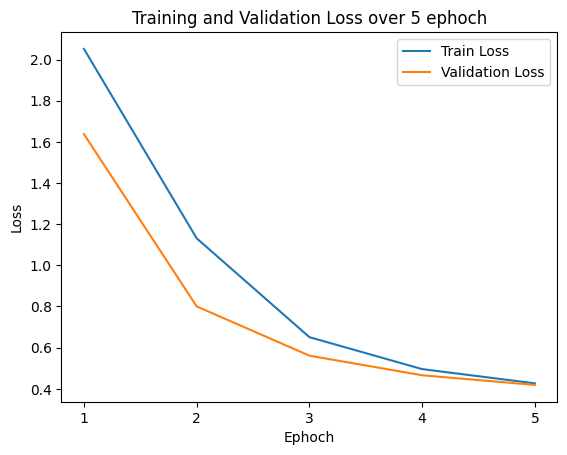

In [37]:
'''train and validation loss as a function of #epochs'''
train_losses, val_losses
x = np.arange(1, nepochs + 1)
plt.xticks(ticks=x)
plt.plot(x, train_losses, label='Train Loss')
plt.plot(x, val_losses, label='Validation Loss')
plt.xlabel('Ephoch')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss over {nepochs} ephoch')
plt.legend()
plt.show()

With the network trained, we can check out it's predictions:

tensor([[2.3375e-02, 1.1491e-04, 5.3190e-04, 7.8718e-03, 3.6888e-04, 8.4735e-01,
         5.6872e-04, 6.1839e-04, 1.1548e-01, 3.7156e-03]])

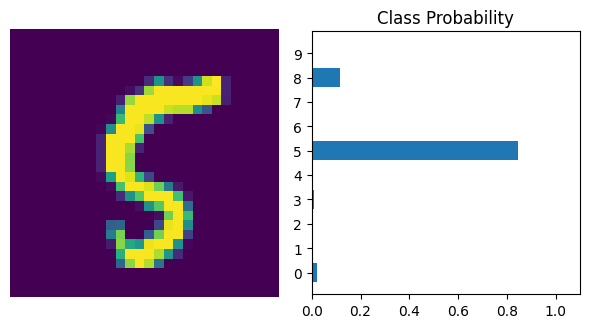

In [38]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, model)

Calculate the model's accuracy on the validation-set.

In [39]:
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      for images, labels in val_loader:
          if is_image_input:
            # flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          log_ps = model(images)
          ps = torch.exp(log_ps)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)

          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [40]:
print(f"Validation accuracy: {evaluate_model(model, val_loader, is_image_input=True)}")

Validation accuracy: 0.8831666707992554


### **5. Convolutional Neural Networks**

In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  

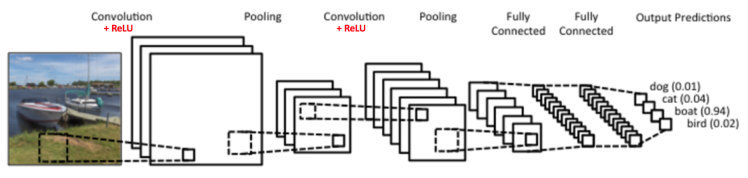

Reminder:  
You can go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**Q1:** Given an image with shape [1,32,32], what will be the shape of the output of a convolution layer with 5 5x5 kernels (filters) without padding?

**A1:**
<font color='red'>
[5,28,28]
</font>

**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,32,32]. What should be the padding?

**A2:**
<font color='red'>
2
</font>

**Q3:** Given an image with width $W_{in}$, height $H_{in}$, and a convolution layer with padding $P$, stride $S$ and filter size $F$. Write a formula for the width $W_{out}$ and a formula for the height $H_{out}$ of the convolution's output.   
(In other words, what will be the width and the height of the output?).

<font color='red'>
$W_{out}$ = ($W_{in}$ + $P$ * 2 - $F$)/$S$  + 1
<br>
$H_{out}$ = ($H_{in}$ + $P$ * 2 - $F$)/$S$ + 1
<br>
Answer: [$W_{out}$, $H_{out}$]
</font>
<br><br>
<font color='#8B0000'>
Notice: if $W_{out}$ or $H_{out}$ aren't natural numbers follow (1) or (2):
<br>
(1) Take the floor of that number, meaning, part of the lower lines of the image wouldn't be convolted (processes).
<br>
(2) Add pedding: it will encrease the input layer - add a little bit computatinal time, and add + 1 to output dim .
</font>

Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [62]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2

        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
cnn_model

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

We can now train the model on the train set.

In [42]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.01

In [43]:
# train the conv model

# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 1.339..  Validation Loss: 0.402.. 
Epoch: 2/3..  Training Loss: 0.277..  Validation Loss: 0.209.. 
Epoch: 3/3..  Training Loss: 0.171..  Validation Loss: 0.148.. 


In [44]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.9539999961853027


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within a few epochs only)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.

You should consider changing:
1. Prepocess:
  - Change normalization
  - Better representation of the data

1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

1. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs



In [98]:
## Prepocess
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Rotate the image by a random degree between -15 and 15
    transforms.RandomAffine(0, translate=(0.1, 0.1)), # geometric modifications to the image: scaling, rotating, translating (shifting), and shearing
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance to flip horizontally
    transforms.RandomVerticalFlip(p=0.1),  # 10% chance to flip vertically (optional)
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Normalize to range [-1, 1] for MNIST
    transforms.ToTensor(),  # Convert to tensor (scales pixel values to [0, 1])
])

'''preprocess imported data'''
mnist_data_t = datasets.MNIST(data_path, download=True, train=True, transform=transform)

'''split trainset into train tranform and validation tranform'''
train_dataset_t, validation_dataset_t = random_split(mnist_data , [0.8, 0.2])

'''create data loader for the trainset (batch_size=64, shuffle=True)'''
train_loader_t = DataLoader(train_dataset_t, batch_size=128, shuffle=True)

'''create data loader for the valset (batch_size=64, shuffle=False)'''
val_loader_t = DataLoader(validation_dataset_t, batch_size=128, shuffle=False)

In [99]:
## Find network and hyperparams that achieve best validation accuracy as possible

# Training hyperparameters
'''
improved model:
  > Network architecture:
      + Add a convolutionl layer - additional layer might combine more features to detect more complex patterns (higher-level abstractions of the data)
      + Increased number of filters - learn more complex features.
      + Additional linear layer and units - better patterns recognition
      + Batch-normalization - to stabilize training and accelerate  convergence
      + Dropout - using dropout with probability of 0.3-0.5 after the fully-connected layers to prevent overfitting.
      + Max Pooling - keep it as main pooling strategy (good for MNIST)
  > Changed Training Hyperparameters:
      + learning_rate - 0.01
      + number_of_ephocs - 6
'''

class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 15, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(15)  # BatchNormalization after conv1

        self.conv2 = nn.Conv2d(15, 30, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(30)  # BatchNormalization after conv2

        self.fc1 = nn.Linear(480, 240)
        self.fc2 = nn.Linear(240, 100)
        self.fc3 = nn.Linear(100, 10)

        # Dropout layer
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = self.bn1(x)
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu

        x = self.conv2(x) # conv 2
        x = self.bn2(x)
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 480) # flatten input

        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu

        x = self.fc2(x) # hidden layer 2
        x = F.relu(x) # relu

        x = self.dropout(x) # dropout with probability of 0.3-0.5

        x = self.fc3(x) # logits layer
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
cnn_model

ConvolutionalNet(
  (conv1): Conv2d(1, 15, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(15, 30, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=480, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [100]:
# set hyperparameters
learning_rate = 0.01
momentum=0.8
cnn_nepochs = 15
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate, momentum=momentum)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

# train the conv model
train_losses_t, val_losses_t = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader_t, val_loader_t, is_image_input=False)

Epoch: 1/15..  Training Loss: 0.481..  Validation Loss: 0.131.. 
Epoch: 2/15..  Training Loss: 0.104..  Validation Loss: 0.096.. 
Epoch: 3/15..  Training Loss: 0.071..  Validation Loss: 0.080.. 
Epoch: 4/15..  Training Loss: 0.056..  Validation Loss: 0.064.. 
Epoch: 5/15..  Training Loss: 0.046..  Validation Loss: 0.059.. 
Epoch: 6/15..  Training Loss: 0.040..  Validation Loss: 0.056.. 
Epoch: 7/15..  Training Loss: 0.035..  Validation Loss: 0.054.. 
Epoch: 8/15..  Training Loss: 0.030..  Validation Loss: 0.053.. 
Epoch: 9/15..  Training Loss: 0.027..  Validation Loss: 0.051.. 
Epoch: 10/15..  Training Loss: 0.023..  Validation Loss: 0.046.. 
Epoch: 11/15..  Training Loss: 0.021..  Validation Loss: 0.050.. 
Epoch: 12/15..  Training Loss: 0.019..  Validation Loss: 0.049.. 
Epoch: 13/15..  Training Loss: 0.017..  Validation Loss: 0.046.. 
Epoch: 14/15..  Training Loss: 0.016..  Validation Loss: 0.049.. 
Epoch: 15/15..  Training Loss: 0.014..  Validation Loss: 0.047.. 


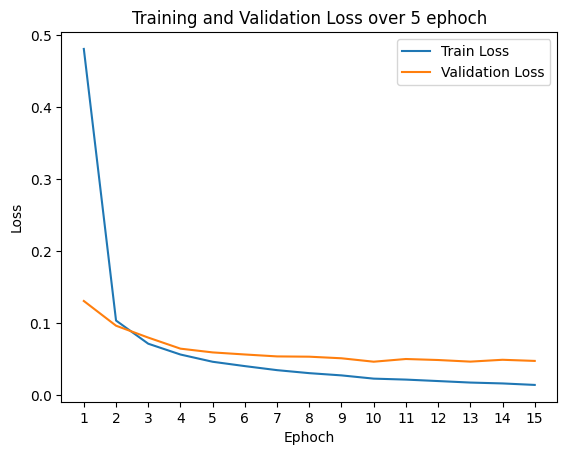

In [101]:
'''train and validation loss as a function of #epochs'''
x = np.arange(1, cnn_nepochs + 1)
plt.xticks(ticks=x)
plt.plot(x, train_losses_t, label='Train Loss')
plt.plot(x, val_losses_t, label='Validation Loss')
plt.xlabel('Ephoch')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss over {nepochs} ephoch')
plt.legend()
plt.show()

In [102]:
# evaluate on the validation set
print(f"Validation accuracy of modified CNN model: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy of modified CNN model: 0.9944999814033508


tensor([[2.3393e-04, 3.1148e-04, 1.3299e-05, 2.4046e-02, 2.0910e-05, 7.7515e-02,
         5.6615e-06, 2.6287e-03, 8.7060e-01, 2.4627e-02]])

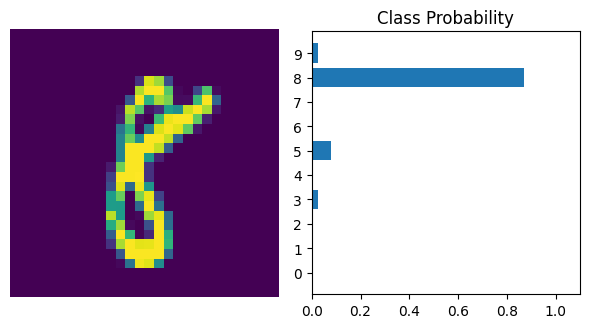

In [115]:
# you can run this cell multiple times for different images
random_prediction_example(mnist_dataloader, cnn_model, is_image_input=True)

In [104]:
'''best model in this variable'''
best_model = cnn_model
best_model

ConvolutionalNet(
  (conv1): Conv2d(1, 15, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(15, 30, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=480, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

When you are satisfied with your model performance on the validation set, load the [test set](https://drive.google.com/file/d/1GFtLV1aNo49IDdObyyvZoTS4w_qEZvjM/view?usp=share_link) (the samples are already normalized), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Upload the file to the Moodle system with this notebook.**

Make sure that each prediction will be printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

In [116]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=32, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")

In [117]:
# run this to save test predictions to "predictions.txt"
predict_and_save(best_model, test_path=f"{ASSIGNMENTNAME}/mnist_test.pth", file_name="predictions.txt")

<ipython-input-116-8fcefbf44aee>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))
